# PUI Fall 2017 HW 6
### Yuwen Chang (ywc249)
### October 2017
### Objective:

In [22]:
from __future__ import print_function, division

from pandas.plotting import scatter_matrix as smx

import numpy as np
import pandas as pd
import geopandas as gp
import statsmodels.formula.api as smf
import pylab as pl
import os

%pylab inline

#if os.getenv("PUIDATA") is None:
#    print ("$PUIDATA to point to set PUIdata dir")

#import statsmodels.api as sm
#from pandas.tools.plotting import scatter_matrix

Populating the interactive namespace from numpy and matplotlib


seed your random functions, use PEP8!

** can we measure and predict energy use based on observables that are easily acquired".
is a proxy for occupancy, and that occupancy is a good predictor of energy consumption.**

** Test: how well does _energy consumed by a building_ relates to the _number of units_ in the building?**

API

# Download and read data (stored in PUIDATA)

In [ ]:
# energy consumption data source:
# https://data.cityofnewyork.us/Environment/Energy-and-Water-Data-Disclosure-for-Local-Law-84-/rgfe-8y2z
link1 = 'https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD'
os.system("curl -o energy.csv " + link1)
os.system("mv energy.csv " + os.getenv("PUIDATA"))

#os.system("mv Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv " + os.getenv("PUIDATA"))

In [ ]:
# pluto Manhattan data source:
# https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page
link2 = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v2.zip'
os.system("curl -O " + link2)
os.system("unzip mn_mappluto_16v2.zip -d " + os.getenv("PUIDATA") + "/Manhattan")

In [2]:
nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA") + "/energy.csv")
bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/Manhattan/MNMapPLUTO.shp")

#nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA") + "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")

In [ ]:
nrg.columns

In [ ]:
bsize.columns

# Data management

In [ ]:
# scatter matrix
smx(nrg, s=300, figsize=(16, 16));

Figure 1: scatter matrix of all numerical values in the files. ... comments on what you see

In [3]:
# make sure you clean up your data and throw away columns you do not need!
nrg.drop(['Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)',
       'Street Number', 'Street Name', 'Borough', 'Postcode',
       'DOF Benchmarking Submission Status',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'NTA'], axis=1, inplace=True)

In [4]:
nrg.rename(columns={'Site EUI(kBtu/ft2)':'EUI',
                    'Reported Property Floor Area (Building(s)) (ft²)':'fl_area',
                    'DOF Number of Buildings':'n_bldg'}, inplace=True)

nrg.head()

,BBL,EUI,fl_area,n_bldg
Record Number,,,,
12086,1.000410e+09,NaN,918919,NaN
14354,4.021460e+09,NaN,NaN,1.0
12150,2.027620e+09,NaN,64200,NaN
12590,1.006700e+09,NaN,NaN,1.0
15591,2.048300e+09,NaN,50000,NaN


In [5]:
# use pd.to_numeric to convert strings to numeric values, 
nrg['EUI'] = pd.to_numeric(nrg['EUI'], errors='coerce')
#print(nrg['EUI'].astype(float))
nrg['fl_area'] = pd.to_numeric(nrg['fl_area'], errors='coerce')
#print(nrg['fl_area'].astype(float))
nrg['n_bldg'] = pd.to_numeric(nrg['n_bldg'], errors='coerce')
#print(nrg['n_bldg'].astype(float))

In [6]:
bsize.drop(['APPBBL', 'APPDate', 'Address',
           'AreaSource', 'AssessLand', 'AssessTot', 'BldgArea', 'BldgClass',
           'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
           'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
           'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
           'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
           'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
           'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
           'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
           'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
           'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
           'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 'SanitDistr',
           'SanitSub', 'SchoolDist', 'SPDist3', 'SplitZone', 'StrgeArea', 'TaxMap',
           'Tract2010', 'Version', 'XCoord', 'YCoord',
           'YearAlter1', 'YearAlter2', 'ZMCode', 'ZipCode',
           'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'ZoneMap',
           'geometry'], axis=1, inplace=True)

In [8]:
bsize.rename(columns={'UnitsRes':'u_res',
                      'UnitsTotal':'u_total',
                      'YearBuilt':'year'}, inplace=True)
bsize.head()

,u_res,u_total,year,BBL
0,0,0,1900,1.000010e+09
1,0,0,1987,1.000090e+09
2,500,602,1902,1.000158e+09
3,0,50,1900,1.000130e+09
4,0,0,1900,1.000010e+09


In [9]:
#but check you can use the columns you want with pluto
bsize.u_res.astype(float)
bsize.u_total.astype(float)
bsize.year.astype(float)
bsize.BBL.astype(float)

0        1.000010e+09
1        1.000090e+09
2        1.000158e+09
3        1.000130e+09
4        1.000010e+09
5        1.000010e+09
6        1.000130e+09
7        1.000090e+09
8        1.000030e+09
9        1.000120e+09
10       1.000030e+09
11       1.000168e+09
12       1.000160e+09
13       1.000030e+09
14       1.000120e+09
15       1.000030e+09
16       1.000030e+09
17       1.000130e+09
18       1.000090e+09
19       1.000090e+09
20       1.000300e+09
21       1.000328e+09
22       1.000318e+09
23       1.000080e+09
24       1.000290e+09
25       1.000290e+09
26       1.000390e+09
27       1.000020e+09
28       1.000350e+09
29       1.000070e+09
             ...     
42656    1.008968e+09
42657    1.010778e+09
42658    1.010478e+09
42659    1.013428e+09
42660    1.014298e+09
42661    1.014738e+09
42662    1.018878e+09
42663    1.018438e+09
42664    1.016308e+09
42665    1.018318e+09
42666    1.019448e+09
42667    1.018448e+09
42668    1.019438e+09
42669    1.019448e+09
42670    1

In [10]:
#How many missing values?
for c in nrg.columns:
    print("invalid entries in %s changed to NaN %d"%(c, sum(np.isnan(nrg.loc[:,c]).sum())))

for c in bsize.columns:
    print("invalid entries in %s changed to NaN %d"%(c, sum(np.isnan(bsize.loc[:,c]).sum())))

invalid entries in BBL changed to NaN 156
invalid entries in EUI changed to NaN 4623
invalid entries in fl_area changed to NaN 3125
invalid entries in n_bldg changed to NaN 1705
invalid entries in u_res changed to NaN 0
invalid entries in u_total changed to NaN 0
invalid entries in year changed to NaN 0
invalid entries in BBL changed to NaN 0


In [11]:
# check data type
type(bsize.BBL.values[0]), type(nrg.BBL.values[0])

#(bsize.BBL.values[0]), (nrg.BBL.values[0])

(numpy.float64, numpy.float64)

In [12]:
data = pd.merge(nrg, bsize, on='BBL').dropna()
data.shape

(4688, 7)

In [13]:
data.head()

,BBL,EUI,fl_area,n_bldg,u_res,u_total,year
2,1.013110e+09,125.4,330000.0,1.0,0,56,1977
15,1.007660e+09,122.3,59468.0,1.0,0,8,1912
16,1.008150e+09,117.0,364000.0,1.0,0,24,1954
18,1.005050e+09,82.1,235370.0,1.0,0,24,1926
19,1.021420e+09,137.7,64806.0,1.0,54,62,1924


# Exploratory analysis

In [ ]:
# Now the scatter matrix plot should show more columns.
smx(data, s=30, figsize=(16, 16));

Figure 2: scatter matix of final dataset (please describe)

each plot needs a descriptive caption, and axis labels**

In [14]:
data['EUI_total'] = data.EUI * data.fl_area

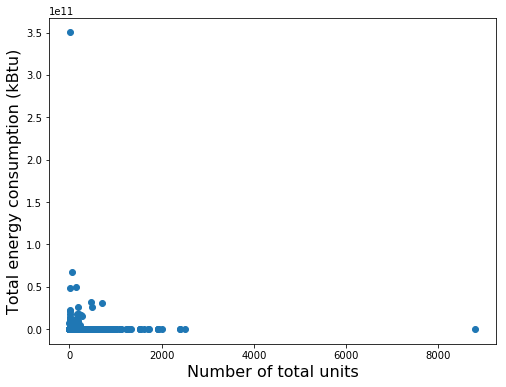

In [15]:
# first scatter plot
pl.figure(figsize=(8,6))
pl.scatter(data.u_total, data.EUI_total)
pl.xlabel('Number of total units', fontsize=16)
pl.ylabel('Total energy consumption (kBtu)', fontsize=16)

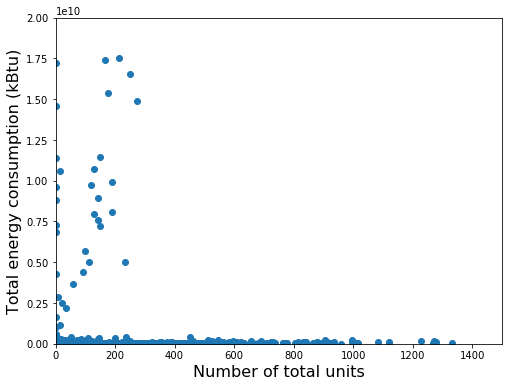

In [16]:
### zoomed in scatter plot
pl.figure(figsize=(8,6))
pl.scatter(data.u_total, data.EUI_total)
pl.xlabel('Number of total units', fontsize=16)
pl.ylabel('Total energy consumption (kBtu)', fontsize=16)
pl.xlim(0, 1500)
pl.ylim(0, 2e10);

In [62]:
#data.drop(data.index[data.u_total == 0], axis=0, inplace=True)
data_cut = data[(data.EUI_total>1000) & (data.u_total>=10) & (data.u_total<1000)]

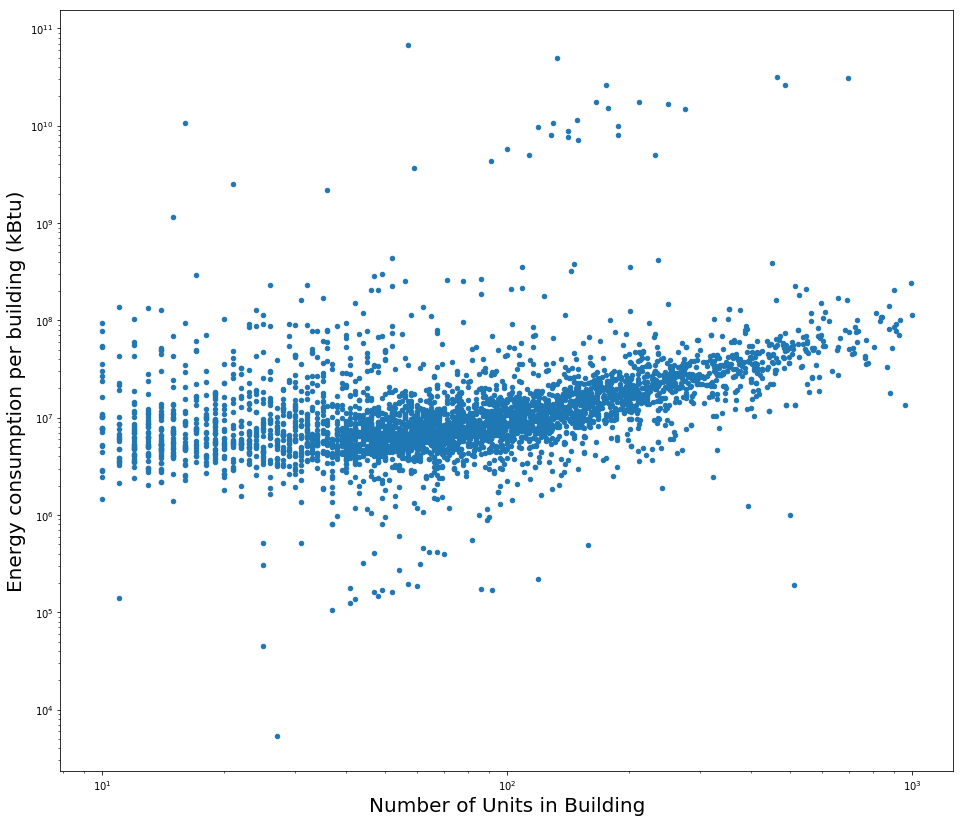

In [21]:
ax = data_cut.plot(kind='scatter', y='EUI_total', x='u_total',
                   marker='o', figsize=(16, 14), loglog=True)
xl = ax.set_xlabel("Number of Units in Building", fontsize=20)
yl = ax.set_ylabel("Energy consumption per building (kBtu)", fontsize=20)

#pl.loglog(data.u_total, data.EUI_total, '.')

Also I removed the buildings with several thousand units. Points like that at the edge of my range would have a lot of "LEVERAGE", however they are not spurious entries like the 0, which I believe are missing values, or perhaps abandoned lots. These are good datapoint that I need to throw away functionally for my analysis to work.

## choose  which is your DEPENDENT and which is your INDEPENDENT variable. 
discuss this but also test both fits, energy vs size and size vs energy. how can you compare these models? 


In [ ]:
# fits and plots here
# your plots should show datapoints (as scatter plot) and models (as lines)
# Make sure your model for the quadratic fit looks right: dont just join the points, you need to sort them first!

1. **Fit a line** to Units vs Energy.

In [40]:
lm0 = smf.ols(formula='np.log10(u_total) ~ np.log10(EUI_total)', data=data_cut, missing='drop').fit()
lm0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log10(u_total)   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     800.6
Date:                Fri, 20 Oct 2017   Prob (F-statistic):          1.13e-160
Time:                        14:45:49   Log-Likelihood:                -1594.5
No. Observations:                3992   AIC:                             3193.
Df Residuals:                    3990   BIC:                             3206.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.5032      0.085     -5.929      0.000      -0.670      -0.337
np.log10(EUI_total)     0.3405      0.012     28.295      0.000       0.317       0.364
==============================================================================
Omnibus:                      153.836   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.715
Skew:                          -0.488   Prob(JB):                     5.16e-38
Kurtosis:                       3.280   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

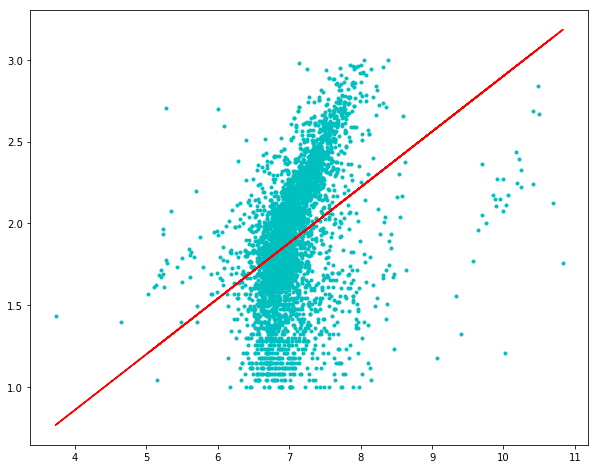

In [45]:
pl.figure(figsize=(10,8))
pl.plot(np.log10(data_cut.EUI_total), np.log10(data_cut.u_total), 'c.')
pl.plot(np.log10(data_cut.EUI_total), lm0.fittedvalues, 'r-')

2. **Fit a line** to Energy vs Units.

In [28]:
lm = smf.ols(formula='np.log10(EUI_total) ~ np.log10(u_total)', data=data_cut, missing='drop').fit()
lm.summary()

#X = sm.add_constant(np.log10(x))
#linmodel = sm.OLS(np.log10(y), X, missing='drop').fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log10(EUI_total)   R-squared:                       0.167
Model:                             OLS   Adj. R-squared:                  0.167
Method:                  Least Squares   F-statistic:                     800.6
Date:                 Fri, 20 Oct 2017   Prob (F-statistic):          1.13e-160
Time:                         14:27:54   Log-Likelihood:                -2324.2
No. Observations:                 3992   AIC:                             4652.
Df Residuals:                     3990   BIC:                             4665.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.1076      0.034    182.100      0.000       6.042       6.173
np.log10(u_total)     0.4908      0.017     28.295      0.000       0.457       0.525
==============================================================================
Omnibus:                     2192.819   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48020.607
Skew:                           2.155   Prob(JB):                         0.00
Kurtosis:                      19.436   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

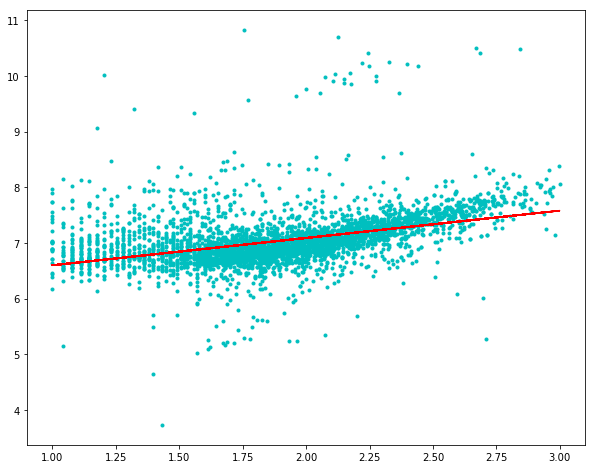

In [39]:
pl.figure(figsize=(10,8))
pl.plot(np.log10(data_cut.u_total), np.log10(data_cut.EUI_total), 'c.')
pl.plot(np.log10(data_cut.u_total), lm.fittedvalues, 'r-')

# my OLS summary

3. **Evaluate which is better by calculating the chi square**.
compare these models with the likelihood ratio test? (hint: are they nested??)

    The function is :
    
    chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$
    
    where the sum is over all datapoints, 
    
    for the i-th value  model($x_i$) is the prediction, data($x_i$) the observation,
    
    and $error_i$ is $\sqrt{data(x_i)}$
    (but remember you worked in log space! What are the proper errors?? see next point)

In [47]:
def chi2(data, model, errors=None):
    '''Calculates the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: series of errors (optional). 
    If errors are not passes all errors are set to 1
    '''
    if errors is None:
        errors = np.ones_like(data)
    if data.shape == model.shape and data.shape == errors.shape:
        return (((data - model)**2) / errors**2).sum()
    else: 
        print ('''ERROR: must pass arrays of identical dimension for data, model and (optional) error)''')
        return -1

4. *Assume Poisson statistics* for the errors on the *independent variable*. Poisson statistics means your uncertainty is the square root of your measurement.


$$
a = b * c
$$


$$
\sqrt{a} = \sqrt{b * c} = \sqrt{b} * \sqrt{c}
$$


In [58]:
# errors on the measured quantities
err_EUI = np.sqrt((data_cut['fl_area'])**2 + (data_cut['EUI']**2)) # error of EUI_total

# Assume count statistics in the number of units as well
err_u = np.sqrt(data_cut.u_total) # error of u_total

#These errors need to be propagated properly through the log

propagation of errors on the log:https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Linear_combinations

$f=a\log _{10}(A)$

$\sigma _{f}\approx \left(a{\frac {\sigma _{A}}{A\ln(10)}}\right)$

In [72]:
err_logEUI = np.abs(err_EUI / data_cut.EUI_total / np.log(10))
err_logu = np.abs(err_u / data_cut.u_total / np.log(10))

data_cut['err_EUI'] = err_logEUI
data_cut['err_u'] = err_logu

/Users/Yuwen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/Yuwen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [70]:
data_cut.head()

,BBL,EUI,fl_area,n_bldg,u_res,u_total,year,EUI_total,err_EUI,err_u
2,1.013110e+09,125.4,330000.0,1.0,0,56,1977,41382000.0,0.003463,0.058035
16,1.008150e+09,117.0,364000.0,1.0,0,24,1954,42588000.0,0.003712,0.088650
18,1.005050e+09,82.1,235370.0,1.0,0,24,1926,19323877.0,0.005290,0.088650
19,1.021420e+09,137.7,64806.0,1.0,54,62,1924,8923786.2,0.003154,0.055155
20,1.021750e+09,103.2,62839.0,1.0,75,85,1920,6484984.8,0.004208,0.047106


In [74]:
chi2(np.log10(data_cut.EUI_total), lm.fittedvalues, data_cut.err_EUI)

3429375307682.7046

5. **Fit a 2nd degree polynomial** to the Units vs Energy

In [48]:
cm = smf.ols(formula='np.log10(EUI_total) ~ np.log10(u_total) + I(np.log10(u_total)**2)', data=data_cut, missing='drop').fit()
cm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log10(EUI_total)   R-squared:                       0.232
Model:                             OLS   Adj. R-squared:                  0.232
Method:                  Least Squares   F-statistic:                     603.4
Date:                 Fri, 20 Oct 2017   Prob (F-statistic):          1.12e-229
Time:                         15:10:16   Log-Likelihood:                -2161.6
No. Observations:                 3992   AIC:                             4329.
Df Residuals:                     3989   BIC:                             4348.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     8.1337      0.115     70.892      0.000       7.909       8.359
np.log10(u_total)            -1.7302      0.122    -14.198      0.000      -1.969      -1.491
I(np.log10(u_total) ** 2)     0.5824      0.032     18.399      0.000       0.520       0.645
==============================================================================
Omnibus:                     2363.734   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65676.793
Skew:                           2.316   Prob(JB):                         0.00
Kurtosis:                      22.323   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
type(cm.fittedvalues.sort_values)

method

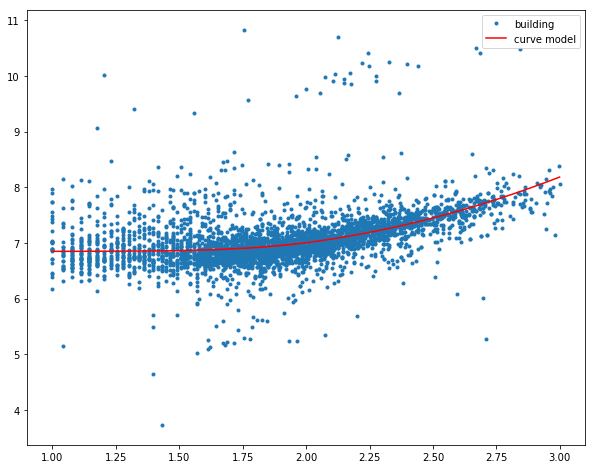

In [112]:
pl.figure(figsize=(10,8))
pl.plot(np.log10(data_cut.u_total), np.log10(data_cut.EUI_total), '.', label='building')
pl.plot(np.log10(data_cut.u_total).sort_values(), cm.fittedvalues.sort_values(), 'r-', markersize=4, label='curve model')
pl.legend();

6. **Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test**

Compare this LR statistics to a chi sq table


$$
\chi_1^{0.05} = 3.84
$$

$H_0:$ The restricted (simpler) model, linear model (lm), is assumed to be nested in the more complex curve model (cm)

Rejected, at $\alpha = 0.05$ lm is not preferable to cm.

In [94]:
print ("LR statistic: ", -2 * (lm.llf - cm.llf))
cm.compare_lr_test(lm)
print ("LR statistic from statsmodels: ", cm.compare_lr_test(lm)[0])
cm.compare_lr_test(lm)

LR statistic:  325.157988067
LR statistic from statsmodels:  325.157988067


(325.15798806713792, 1.0899519200204675e-72, 1.0)

## Extra credit 1: calculate and plot the likelihood surface
Create a function that minimizes the residuals:

the residuals are the sum of the differences between data and model: in the case of a line fit model. Use the same function you created for the chi^2 test.

You should sum over each datapoints the residuals squared, which should look something like

(np.log(bblnrgdatacut.nrg) - np.log(bblnrgdatacut.UnitsTotal)*a+b )^2 / errors^2

where a and b are the parameters returned by the line fitter. 

For each data point you can calculate the model at different values : for example in a range B = np.arange (-100, 100, 1) for the intercept, and A = np.arange(-50.0, 50.0, 0.5) for the slope.


You can write it as a nested for loop (or challenge yourself and vectorize it!) with a loop inside another ranging all poissible combinations of the 2 variables (i use enumerate to get both an index from 0 to the size of my array, which i assign to i (and j) and the value of the array at that index - look up the syntax!):


Lsurface = np.zeros((len(A), len(B)))
for i,a in enumerate(A):
    for j,b in enumerate(B):
         Lsurface[i][j] = np.nansum(residuals(a,b,data,errors)) .....

this gives you a 2D array that represents your likelihood surface! What we do to find a good fit is find the minimum (lowest point) on this surface.
You can plot a surface (a 2D array) with pl.imshow(Lsurface) as a "heatmap" but when you do that you will find that the plot is very uninformative. just like you did before with the data, plot the log of it (pl.imshow(np.log(Lsurface)). Also make sure your x and y axes tick numbers represent the range of values, not the cell index, which is the default for imshow. Inputting your data in the cell below should give a plot similar to mine

NameError: name 'Lsurface' is not defined

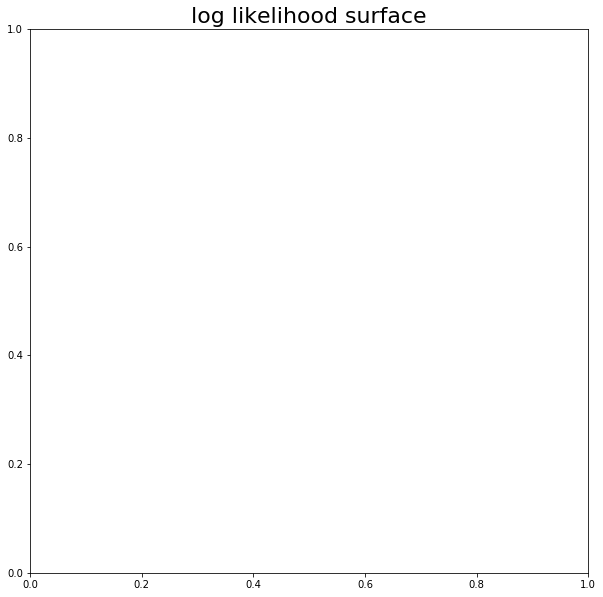

In [56]:
pl.figure(figsize=(10,10))
pl.title ("log likelihood surface", fontsize = 22)
pl.imshow(np.log(Lsurface), extent = [-50,50,100,-100], aspect=0.5)
pl.xlabel('slope', fontsize = 22)
pl.ylabel('intercept', fontsize = 22)
pl.colorbar()

## EXTRA CREDIT: get creative with the dataset. can you make an insigntful plot to show any structure in the data?

below I am mapping the building age to a colormap and the ratio of total to residential units to the size of the datapoint.

In [ ]:
bblnrgdata['YearBuilt'][bblnrgdata['YearBuilt']<1800]=1800

bblnrgdata.plot(kind='scatter',x='nrg',y='UnitsTotal', 
                fontsize=22, colormap='gist_rainbow', alpha = 1, 
                marker='o',  figsize=(16, 14), loglog=True,  
                xlim=(1000,1e11), ylim=(1,1000), 
                c=bblnrgdata['YearBuilt']-1900, 
                s=bblnrgdata['UnitsTotal']/bblnrgdata['UnitsRes']*100)
pl.title('Color maps Age in years, Size maps tital/residential units', fontsize=18)
pl.ylabel("total number of units", fontsize=22)
pl.xlabel("total energy consumption (kBtu)", fontsize=22)